In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree

In [169]:
df = pd.read_csv("Fraud_check.csv")

In [170]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# **EDA**

In [171]:
#Missing values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [172]:
#rename

df = df.rename(columns = {"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"})

In [173]:
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [174]:
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [175]:
df['status'] = df['Taxable_Income'].apply(lambda Taxable_Income: 'Risky' if Taxable_Income <= 30000 else 'Good')
#df.status[(df['Taxable_Income'] <= 30000)]
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [176]:
#Encryption
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [177]:
df["Undergrad"] = le.fit_transform(df["Undergrad"])
df["Urban"] = le.fit_transform(df["Urban"])
df["Marital_Status"] = le.fit_transform(df["Marital_Status"])
df["status"] = le.fit_transform(df["status"])
df

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [178]:
df.drop(['Taxable_Income'], axis=1, inplace=True)

In [179]:
#separate the independent and dependent features
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [180]:
#split into training and testing
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state=20)

In [181]:
xtrain

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
121,1,1,86648,16,1
263,1,1,69386,21,1
197,0,2,98056,4,1
93,1,1,137676,3,1
74,0,0,182319,17,0
...,...,...,...,...,...
218,0,1,38091,19,0
223,1,1,192297,17,1
271,0,2,183682,20,0
474,1,0,80729,0,0


# **Model building**

In [182]:
#creating the DT model based on entropy with max depth of 3

model = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [183]:
#fitting the model to training data

model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [184]:
#Predict value using test value
ypred = model.predict(xtest)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [185]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
model.score(xtrain,ytrain)

0.7979166666666667

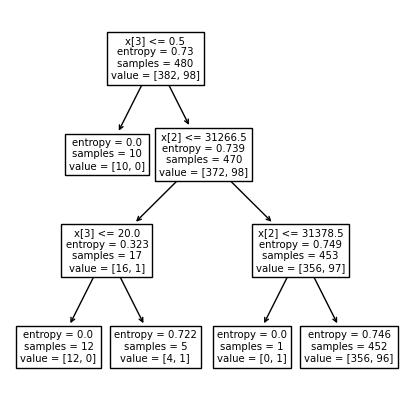

In [187]:
plt.figure(figsize=(5,5))
tree.plot_tree(model)
plt.show()

In [188]:
x

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [189]:
fn = x.columns
fn

Index(['Undergrad', 'Marital_Status', 'City_Population', 'Work_Experience',
       'Urban'],
      dtype='object')

In [190]:
cn = ['Risky', 'Good']

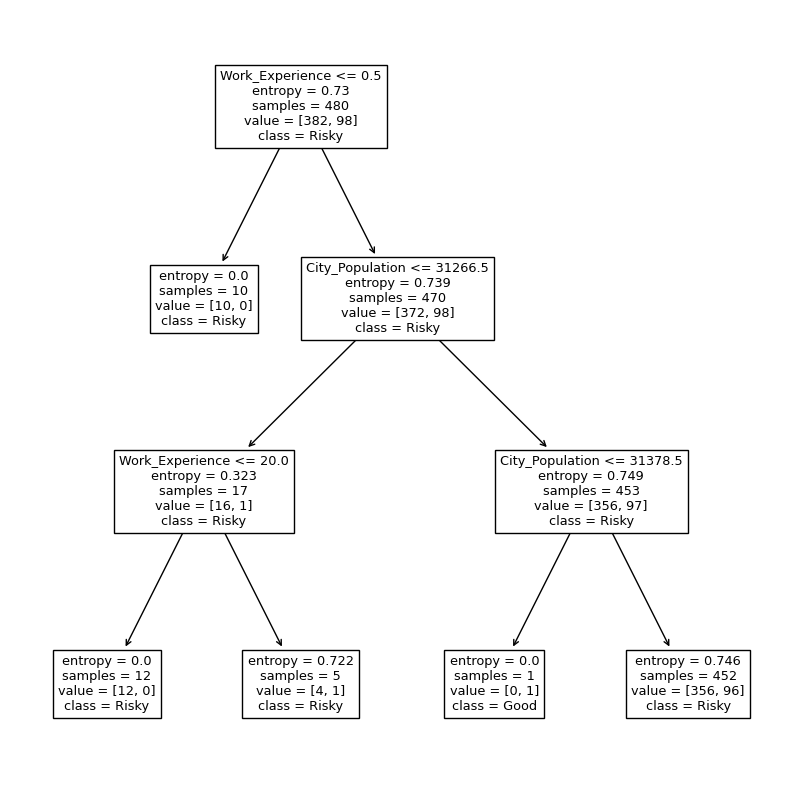

In [191]:
plt.figure(figsize=(10,10))
tree.plot_tree(model, feature_names = fn, class_names= cn)
plt.show()

In [192]:
model.feature_importances_

array([0.        , 0.        , 0.46139827, 0.53860173, 0.        ])